### Contents:
* [1. Problem Formulation](#1)
* [2. Collecting the Data](#2)
* [3. Exploratory Data Analysis](#3)
* [4. Data Preprocessing](#4)
* [5. Choosing and Training a Model](#5)
* [6. Evaluating a Model](#6)

<a name='1'><a>
---

# **1. Problem Formulation**

**Objective:**
To predict student academic performance using multiple factors through **Multiple Linear Regression**, and to understand which factors most significantly influence student outcomes.

**Dataset Overview:**

* **Source:** Kaggle – *Student Performance (Multiple Linear Regression)*
* **Number of Records:** 10,000
* **Features:** 6 input variables (academic and personal factors)
* **Target Variable:** `Performance_Index` (numerical measure of student performance)

**Problem Statement:**

* Predict the `Performance_Index` for each student using available features.
* Identify the most important factors that affect student performance.
* Evaluate the regression model using metrics such as **R² score**, **MAE**, and **RMSE**.

**Challenges / Considerations:**

* Handling duplicate entries in the dataset.
* Checking for multicollinearity among features.
* Ensuring proper preprocessing and scaling if necessary.

**Expected Outcome:**

* A regression model capable of predicting student performance with reasonable accuracy.
* Insights into key factors that influence student performance.

---

<a name='2'><a>
# **2. Collecting the Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/content/student_performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


---

### **Feature Information**

| **Feature Name**                   | **Type**  | **Description**                                           |
| ---------------------------------- | --------- | --------------------------------------------------------- |
| `Hours Studied`                    | Numerical | Number of hours the student studies per week              |
| `Previous Scores`                  | Numerical | Scores obtained in previous exams or assessments          |
| `Extracurricular Activities`       | Numerical | Hours spent on extracurricular activities per week        |
| `Sleep Hours`                      | Numerical | Average number of hours the student sleeps per day        |
| `Sample Question Papers Practiced` | Numerical | Number of sample/question papers practiced by the student |
| `Performance Index`                | Numerical | **Target variable** – Overall academic performance index  |


Source: Kaggle

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
len(df)

10000

In [5]:
len(df.columns)

6

<a name='3'><a>
# **3. Exploratory Data Analysis (EDA)**

Spliting data into training and testing sets to avoid data leakage.

Training set → used to train the model

Testing set → used to evaluate the model

Using scikit-learn function to split the data before analysis.

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=20)

print('Size of train data: {}\nSize of test data: {}'.format(len(train_data), len(test_data)))

Size of train data: 8000
Size of test data: 2000


#### Copying the training data to revert it in case I mess things up:

In [7]:
train_data_1 = train_data.copy()

In [8]:
train_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4.980125,69.553125,6.523375,4.564250,55.286750
std,2.592069,17.355376,1.696043,2.857909,19.237107
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,70.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
train_data.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


#### There is no missing value.

### Checking value in the categorical feature(s)

In [10]:
train_data['Extracurricular Activities'].value_counts()

,count
Extracurricular Activities,
No,4044
Yes,3956


<Axes: xlabel='count', ylabel='Extracurricular Activities'>

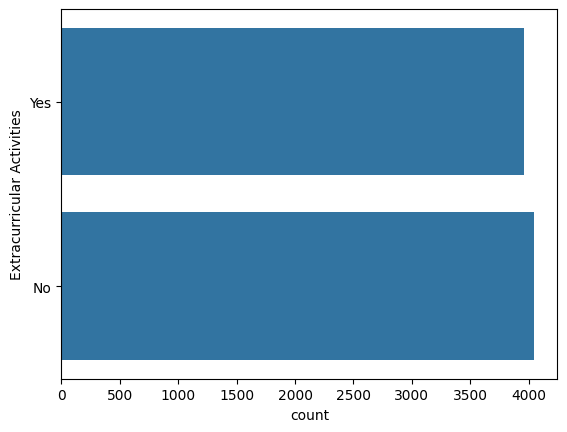

In [11]:
sns.countplot(train_data['Extracurricular Activities'])

### Checking correlation between features

<Axes: >

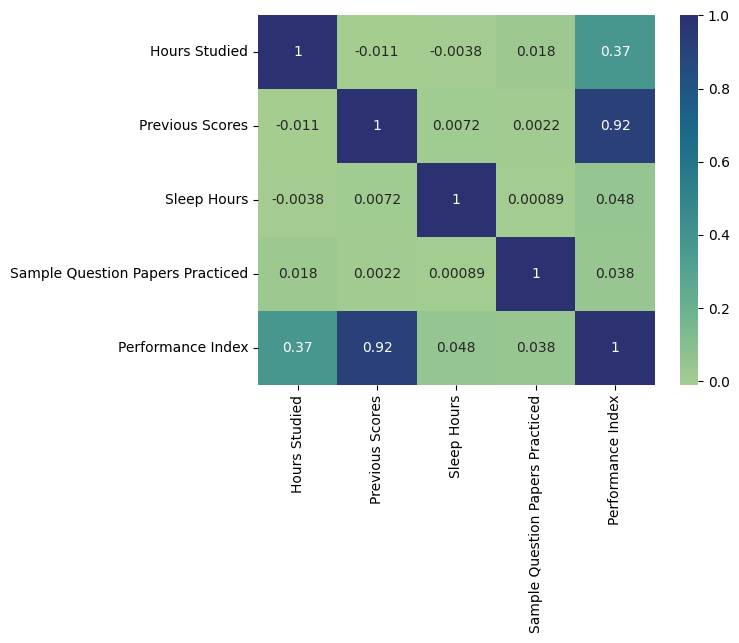

In [12]:
correlation = train_data.drop('Extracurricular Activities', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='crest')

#### Correlation Insights:


*   `Previous Scores` ↔ `Performance Index` and `Hours Studied` ↔ `Performance Index` are highly correlated.

    * Makes sense: more hours studied/ more previous scores → more performance index.

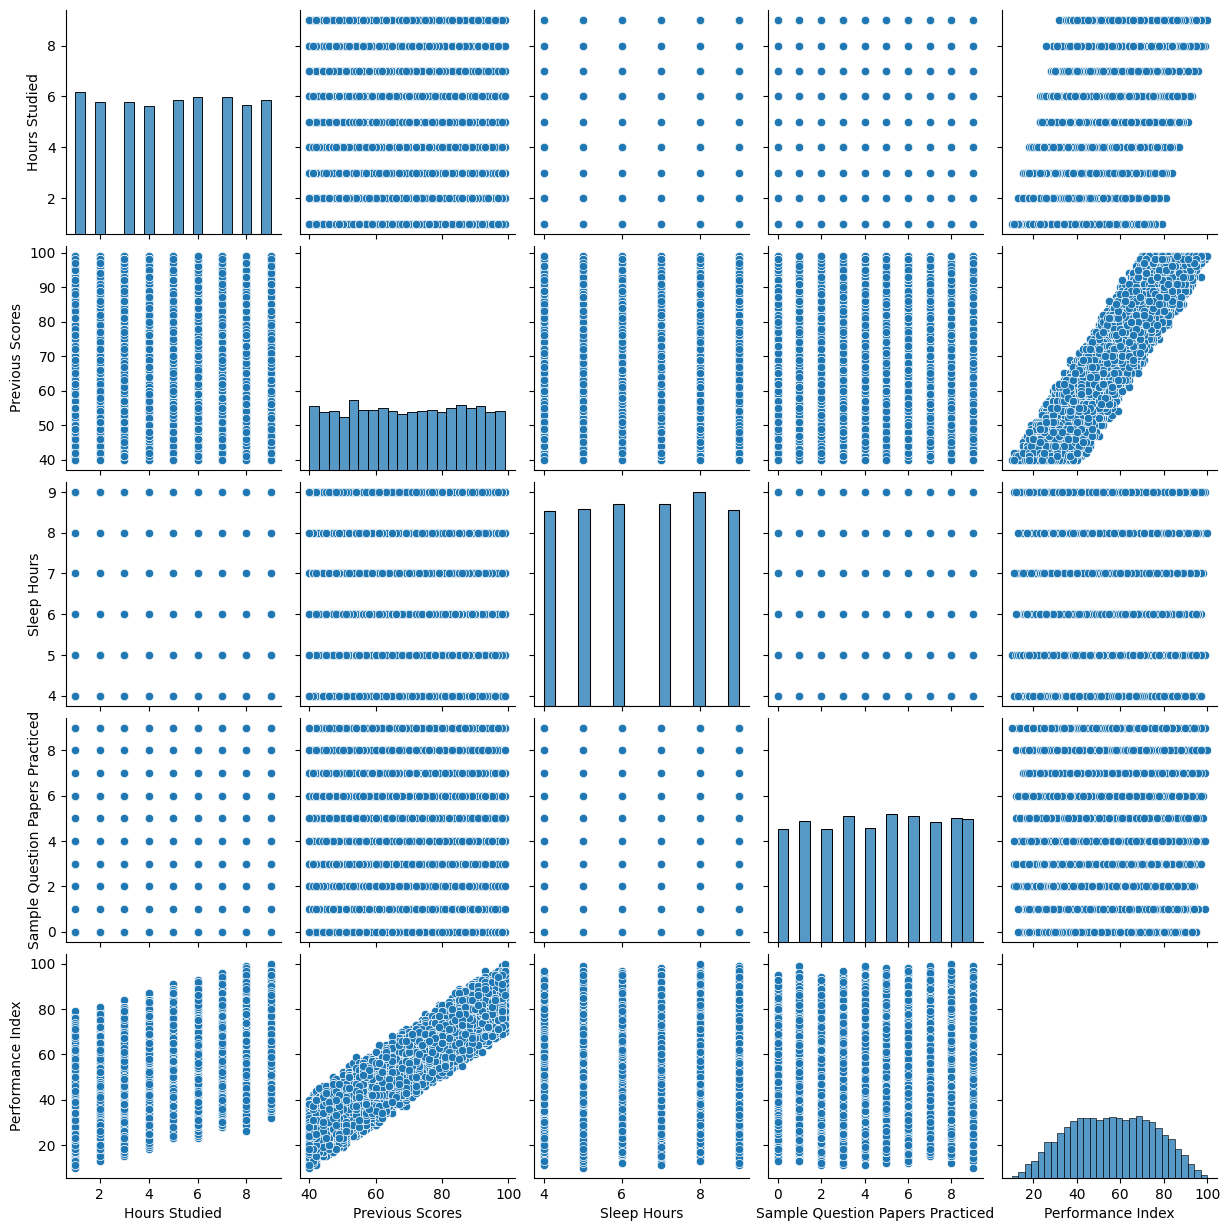

In [13]:
sns.pairplot(train_data)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

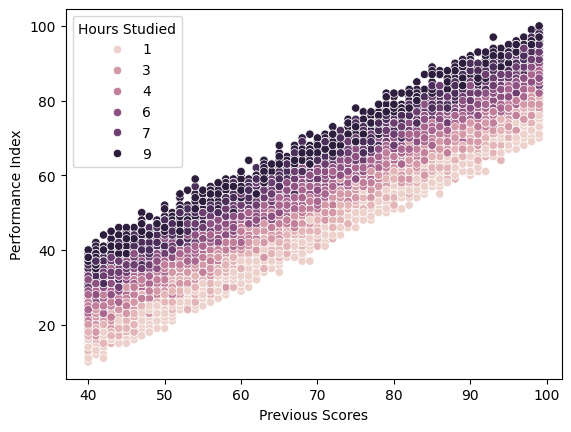

In [14]:
sns.scatterplot(data = train_data, x='Previous Scores', y='Performance Index', hue='Hours Studied')

<a name='4'><a>
# **4. Data Preprocessing**

* Making data ready for the ML model.
* Applying the same steps to train and test sets.

    Key steps:
    * Filling missing values
    * Converting categorical features to numbers
    * Scaling numeric features

* Using functions wherever possible to apply the same steps consistently.

In [15]:
# Preparing training data
# x = all features except target
# y = target/label (median_house_value)

x_train = train_data.drop('Performance Index', axis=1)
y_train = train_data['Performance Index']

In [16]:
x_train.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4661,1,66,Yes,8,7
7168,7,47,No,5,3
1031,1,46,No,6,6


In [17]:
y_train.head()

,Performance Index
4661,42.0
7168,36.0
1031,20.0
6746,69.0
9228,61.0


#### As there is no missing values, I just need to do "Encoding Categorical Features" and "Scaling Numerical Features".

### Encoding Categorical Features

In [18]:
x_train['Extracurricular Activities'] = x_train['Extracurricular Activities'].map({'No':0, 'Yes':1})
x_train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4661,1,66,1,8,7
7168,7,47,0,5,3
1031,1,46,0,6,6
6746,2,86,1,8,3
9228,9,63,0,4,5


### Scaling Numerical Features

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)

scaled_x_train

array([[-1.53559737, -0.20474043,  1.01106117,  0.87068368,  0.85233728],
       [ 0.77930083, -1.2995705 , -0.98905984, -0.89824955, -0.54737497],
       [-1.53559737, -1.35719313, -0.98905984, -0.30860514,  0.50240922],
       ...,
       [ 0.39348447,  1.69680654, -0.98905984, -1.48789397, -0.89730304],
       [-1.53559737, -0.26236306,  1.01106117, -0.89824955, -1.59715917],
       [-0.76396463,  0.42910856,  1.01106117,  0.87068368,  0.15248115]])

<a name='5'><a>

# **5. Choosing and Training a Model**

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(scaled_x_train, y_train)

LinearRegression()

In [21]:
# Coefficients → also called Weights
# Each coefficient corresponds to one feature

model.coef_

array([ 7.39327647, 17.67734532,  0.29685806,  0.83129737,  0.56076079])

In [22]:
# Intercept → also called Bias
# This is a constant added in the linear equation

model.intercept_

np.float64(55.28674999999999)

<a name='6'><a>
# **6. Model Evaluation**

Notes:
 - MAE → average absolute error (lower is better)
 - RMSE → like MAE but penalizes large errors more
 - R² → 1.0 is perfect, 0 means model is as bad as guessing the mean

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# I make predictions on the training data
y_train_pred = model.predict(scaled_x_train)

# I calculate errors by comparing true labels vs predicted labels
mse = mean_squared_error(y_train, y_train_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                               # Root MSE → easier to interpret
mae = mean_absolute_error(y_train, y_train_pred)  # Mean Absolute Error
r2 = r2_score(y_train, y_train_pred)             # R² score → how well model explains data

In [24]:
# Showing results
print("Model Evaluation Results:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R²   (R-squared): {r2:.2f}")

Model Evaluation Results:
MAE  (Mean Absolute Error): 1.62
RMSE (Root Mean Squared Error): 2.04
R²   (R-squared): 0.99


In [25]:
accuracy = r2 * 100
print(f"Accuracy (R² %): {accuracy:.2f}%")

Accuracy (R² %): 98.88%
